# **Klasifikasi Berita**




## Tujuan

Tujuan proyek ini adalah membuat model klasifikasi untuk membedakan berita dari situs "Times Indonesia" ke dalam dua kategori, yaitu "Wisata" dan "Kuliner". Model ini akan mengelompokkan berita berdasarkan konten untuk efisiensi dalam pengelolaan data berita.








## Data Understanding

- Sumber data: Times Indonesia (https://timesindonesia.co.id/), yang diambil dengan cara crawling dari website menggunakan BeautifulSoup
- Jumlah data sebanyak 100 data dengan dua kategori yaitu "Wisata" dan "Kuliner"
- Fitur yang diambil saat crawling yait judul, isi berita, tanggal berita, dan kategori berita.

## Preprocessing

Preprocessing yang dilakukan:
- Label Encoder: Mengubah kategori mejadi binary, 0 untuk Kuliner dan 1 untuk Wisata.
- Cleansing: Menghapus elemen-elemen yang tidak relevan seperti URL, tag HTML, emoji, angka, dan simbol.
- Case Folding: Mengubah semua teks menjadi huruf kecil untuk konsistensi.
- Tokenization: Memecah kalimat menjadi kata-kata.
- Stopword Removal: Menghapus kata-kata umum yang tidak berpengaruh terhadap konteks, seperti "di", "dan", "yang".
- Stemming: Mengubah kata-kata menjadi bentuk dasarnya, misalnya "makan" dari "makanan".
- TF-IDF: Melakukan transformasi teks menjadi vektor berbobot berdasarkan frekuensi kata (TF-IDF).

## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW"

/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [4]:
data = pd.read_csv("/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/berita_cleaned.csv")

In [5]:
data.head()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,Kategori,cleansing,case_folding,tokenize,no_stopwords,stemmed,stemmed_text
0,Kedubes RI di Tunisia Ajak Jelajahi Keindahan ...,"TIMESINDONESIA, BANYUWANGI – Kedutaan Besar Re...",08/09/2024 - 19:47,Wisata,1,TIMESINDONESIA BANYUWANGI Kedutaan Besar Repu...,timesindonesia banyuwangi kedutaan besar repu...,"['timesindonesia', 'banyuwangi', 'kedutaan', '...","['timesindonesia', 'banyuwangi', 'kedutaan', '...","['timesindonesia', 'banyuwangi', 'duta', 'repu...",timesindonesia banyuwangi duta republik indone...
1,Rekomendasi Hotel Bintang 5 di Kawasan Puncak ...,"TIMESINDONESIA, CIANJUR – Berlibur atau melaku...",08/09/2024 - 09:00,Wisata,1,TIMESINDONESIA CIANJUR Berlibur atau melakuka...,timesindonesia cianjur berlibur atau melakuka...,"['timesindonesia', 'cianjur', 'berlibur', 'ata...","['timesindonesia', 'cianjur', 'berlibur', 'per...","['timesindonesia', 'cianjur', 'libur', 'jalan'...",timesindonesia cianjur libur jalan bisnis cian...
2,Menikmati Sensasi Petik Melon di Desa Balongwo...,"TIMESINDONESIA, MOJOKERTO – Ketika bosan denga...",07/09/2024 - 13:09,Wisata,1,TIMESINDONESIA MOJOKERTO Ketika bosan dengan ...,timesindonesia mojokerto ketika bosan dengan ...,"['timesindonesia', 'mojokerto', 'ketika', 'bos...","['timesindonesia', 'mojokerto', 'bosan', 'buah...","['timesindonesia', 'mojokerto', 'bosan', 'buah...",timesindonesia mojokerto bosan buah melon pasa...
3,Sejumlah Influencer Kepincut Pelayanan dan Fas...,"TIMESINDONESIA, BANYUWANGI – Luminor Hotel Ban...",07/09/2024 - 06:08,Wisata,1,TIMESINDONESIA BANYUWANGI Luminor Hotel Banyu...,timesindonesia banyuwangi luminor hotel banyu...,"['timesindonesia', 'banyuwangi', 'luminor', 'h...","['timesindonesia', 'banyuwangi', 'luminor', 'h...","['timesindonesia', 'banyuwangi', 'luminor', 'h...",timesindonesia banyuwangi luminor hotel banyuw...
4,5 Pantai Unik dan Cantik Masuk Kawasan TN Mata...,"TIMESINDONESIA, SUMBA TIMUR – Ternyata di Pula...",01/09/2024 - 14:16,Wisata,1,TIMESINDONESIA SUMBA TIMUR Ternyata di Pulau ...,timesindonesia sumba timur ternyata di pulau ...,"['timesindonesia', 'sumba', 'timur', 'ternyata...","['timesindonesia', 'sumba', 'timur', 'pulau', ...","['timesindonesia', 'sumba', 'timur', 'pulau', ...",timesindonesia sumba timur pulau sumba pantai ...


Kategori
1    50
0    50
Name: count, dtype: int64


<ipython-input-36-0e4aa326e71d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_distribution.index, y=kategori_distribution.values, palette='Blues')


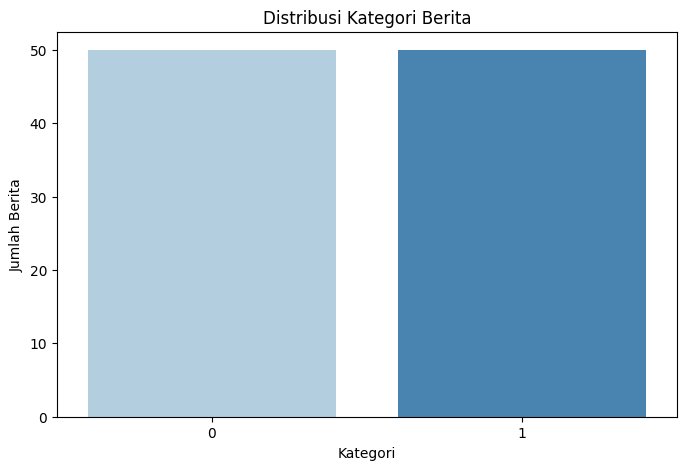

In [36]:
# Hitung distribusi kategori
kategori_distribution = data['Kategori'].value_counts()

# Tampilkan distribusi kategori
print(kategori_distribution)

# Visualisasi distribusi kategori
plt.figure(figsize=(8, 5))
sns.barplot(x=kategori_distribution.index, y=kategori_distribution.values, palette='Blues')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Berita')
plt.title('Distribusi Kategori Berita')
plt.show()

In [6]:
X = data['stemmed_text']  # Ganti dengan nama kolom yang sesuai
y = data['Kategori']  # Target yang akan diklasifikasikan

# Split data menjadi training dan testing set (misalkan 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer()

# Fit dan transformasi hanya pada data train
X_train_tfidf = tfidf_vect.fit_transform(X_train)


In [8]:
X_train_tfidf.toarray()

array([[0.        , 0.        , 0.30546484, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07579347, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02775031, ..., 0.        , 0.        ,
        0.        ]])

Setelah dilakukan pembobotan tf_idf maka fitur menjadi sebanyak 1372 fitur kata, untuk pembagian data yaitu 80 data training dan 20 data testing.

In [9]:
X_train_tfidf.shape

(80, 1372)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
# Simpan TF-IDF Vectorizer ke file .pkl
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

## Modelling

### Pengertian Logistic Regression
Logistic regression adalah salah satu teknik statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (kategorikal dengan dua nilai, misalnya 0 dan 1) dengan satu atau lebih variabel independen.  Regresi logistik digunakan untuk memprediksi probabilitas hasil biner (yaitu,
dua kemungkinan hasil seperti “ya” atau “tidak”, spam, atau “bukan spam”).  
Logistic regression digunakan untuk memprediksi probabilitas bahwa sebuah instance termasuk ke dalam salah satu dari dua kategori. Jika probabilitas tersebut lebih besar dari 0.5, maka model akan memprediksi bahwa instance tersebut termasuk ke kategori 1 (misalnya "positif"), jika kurang dari 0.5, model memprediksi kategori 0 (misalnya "negatif")

### Fungsi Sigmoid

Inti dari logistic regression adalah fungsi logistik atau sigmoid, yang digunakan untuk memetakan hasil prediksi ke dalam rentang probabilitas antara 0 dan 1. Fungsi sigmoid ini memiliki bentuk:

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Di mana  adalah kombinasi linier dari variabel input (prediktor).

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$





### Menghitung Gradien

Gradien fungsi cost terhadap $\beta_1$ adalah:
$$
\frac{\partial J(\beta)}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_{i1}
$$

 dimana $x_{i1}$ adalah nilai fitur pertama untuk observasi ke-i, dan $\hat{y}_i$ adalah probabilitas
 yang diprediksi untuk observasi ke-i.


### Memperbarui $\beta_1$

Untuk memperbarui $\beta_1$ menggunakan fungsi berikut:
$$
\beta_j := \beta_j - \alpha \cdot \frac{\partial J(\beta)}{\partial \beta_j}
$$

Terus perbarui $\beta$ hingga fungsi biaya $J(\beta)$ konvergen (yaitu, perubahan berada
 di bawah ambang batas yang ditetapkan) atau hingga jumlah iterasi maksimum tercapai.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

### Logistic Regression Tanpa PCA

In [12]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model dengan data train yang sudah di-TF-IDF
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Prediksi pada data train
y_train_pred = logreg.predict(X_train_tfidf)

In [14]:
# Tampilkan akurasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Akurasi pada data train (sebelum PCA): {train_accuracy * 100:.2f}%")

Akurasi pada data train (sebelum PCA): 100.00%


In [ ]:
# Simpan model Logistic Regression ke dalam file .pkl
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

### Logistic Regression Dengan PCA

PCA adalah teknik untuk mereduksi dimensi data dengan menemukan komponen-komponen utama yang mewakili variansi terbesar dalam data. Dengan mempertahankan 95% varians dari total data maka tersisa 13 fitur setelah dilakukan PCA. Jumlah komponen yang dipilih tidak ditentukan secara eksplisit, melainkan secara otomatis dihitung oleh PCA berdasarkan berapa banyak komponen yang dibutuhkan untuk mencapai 95% variansi.

In [15]:
from sklearn.decomposition import PCA

In [16]:
# Lakukan PCA untuk mereduksi dimensi data train
pca = PCA(n_components=0.95)  # Menjaga 95% variance dari data
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())  # Konversi sparse matrix ke array

In [18]:
X_train_pca

array([[ 0.09723011, -0.54039718, -0.06346608, ..., -0.03748443,
         0.08129374,  0.01322361],
       [ 0.04710448, -0.21421772, -0.05603088, ...,  0.04856403,
         0.10851427, -0.02818656],
       [ 0.00835743, -0.15982722,  0.02181279, ...,  0.53493895,
         0.54500489, -0.046846  ],
       ...,
       [ 0.00118203, -0.21917827,  0.02290411, ...,  0.5244392 ,
        -0.66705826,  0.03828967],
       [ 0.03314654, -0.26124963,  0.0048094 , ..., -0.19039508,
         0.21603337, -0.05267517],
       [-0.17668702, -0.05840263, -0.49980674, ..., -0.05560486,
         0.00715464,  0.06474722]])

In [19]:
X_train_pca.shape

(80, 13)

In [20]:
# Tampilkan jumlah komponen yang dipertahankan
print(f"Jumlah komponen setelah PCA: {pca.n_components_}")

# Cek variansi yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_
print(f"Variansi yang dijelaskan setiap komponen PCA: {explained_variance}")

# Tampilkan total variansi yang dijelaskan (harus mendekati 0.95)
total_explained_variance = explained_variance.sum()
print(f"Total variansi yang dijelaskan: {total_explained_variance}")

# ''' Jumlah fitur yang tersisa setelah PCA bergantung pada variansi data.
# Jika setelah menerapkan PCA jumlah fitur yang tersisa hanya 13 (dengan shape (80, 13)),
# ini mungkin karena variansi yang signifikan pada datasetmu bisa dijelaskan hanya oleh 13 komponen.
# PCA mereduksi dimensi berdasarkan variansi, jadi meskipun kamu meminta untuk mempertahankan 95% variansi,
# jika 95% dari variansi tersebut dapat dijelaskan hanya dengan 13 komponen, maka hanya 13 fitur yang akan dipertahankan.'''

Jumlah komponen setelah PCA: 13
Variansi yang dijelaskan setiap komponen PCA: [0.12763321 0.1002164  0.09131641 0.08515655 0.07621834 0.0734178
 0.0691683  0.06348499 0.05973788 0.05652583 0.05513798 0.0547931
 0.04371592]
Total variansi yang dijelaskan: 0.9565227068220999


In [21]:
# Fit Logistic Regression pada data yang sudah direduksi dengan PCA
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Prediksi pada data train setelah PCA
y_train_pred_pca = logreg_pca.predict(X_train_pca)

In [22]:
# Tampilkan akurasi setelah PCA pada data train
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
print(f"Akurasi pada data train (setelah PCA): {train_accuracy * 100:.2f}%")

Akurasi pada data train (setelah PCA): 100.00%


In [ ]:
# Simpan model PCA ke dalam file .pkl
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [ ]:
# Simpan model Logistic Regression ke dalam file .pkl
with open('logreg_pca_model.pkl', 'wb') as file:
    pickle.dump(logreg_pca, file)

### Uji Model

Model yang dipilih adalah Logistic Regression dengan PCA dengan akurasi pada training 100%

In [23]:
# Load kembali TF-IDF Vectorizer dari file .pkl untuk digunakan pada data test
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_tfidf_vectorizer = pickle.load(f)

In [24]:
# Sekarang load model untuk data test
X_test_tfidf = loaded_tfidf_vectorizer.transform(X_test)
X_test_pca = pca.transform(X_test_tfidf.toarray())  # Transform data test dengan PCA

In [25]:
X_test_pca.shape

(20, 13)

In [26]:
# Prediksi pada data test
y_test_pred_pca = logreg_pca.predict(X_test_pca)

# Tampilkan akurasi pada data test setelah PCA
test_accuracy = accuracy_score(y_test, y_test_pred_pca)
print(f"Akurasi pada data test: {train_accuracy * 100:.2f}%")


Akurasi pada data test: 100.00%


In [27]:
# Buat DataFrame untuk menampilkan perbandingan antara data asli dan prediksi
comparison_df = pd.DataFrame({
    'Asli': y_test,
    'Prediksi': y_test_pred_pca
})

# Tampilkan beberapa baris dari DataFrame perbandingan
print(comparison_df.head(10))  # Menampilkan 10 baris pertama

# Tampilkan jumlah prediksi benar dan salah
correct_predictions = (comparison_df['Asli'] == comparison_df['Prediksi']).sum()
incorrect_predictions = (comparison_df['Asli'] != comparison_df['Prediksi']).sum()


    Asli  Prediksi
83     0         0
53     0         0
70     0         0
45     1         1
44     1         1
39     1         1
22     1         1
80     0         0
10     1         1
0      1         1


## Evaluasi

Evaluasi pada proyek ini menampilkan confusion matriks dengan distribusi prediksi model antara True Positive, False Positive, True Negative, dan False Negative. Kemudian ditampilkan juga akurasinya.

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

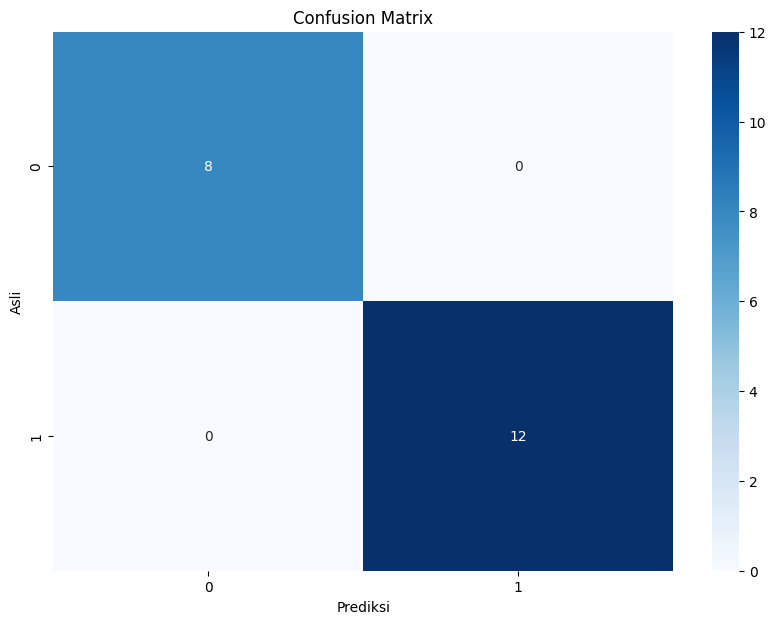

In [29]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_test_pred_pca)

# Tampilkan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_pca.classes_, yticklabels=logreg_pca.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Hitung dan tampilkan akurasi
# jumlah prediksi benar/total prediksi
accuracy = accuracy_score(y_test, y_test_pred_pca)
print(f"Akurasi: {accuracy* 100:.2f}%")

Akurasi: 100.00%


## Implementasi Data Baru

In [ ]:
 !pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
import pickle
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Load model, TF-IDF Vectorizer, dan PCA
with open('logreg_pca_model.pkl', 'rb') as model_file:
    logreg_pca_model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vect = pickle.load(tfidf_file)

with open('pca_model.pkl', 'rb') as pca_file:  # Pastikan PCA disimpan
    pca_model = pickle.load(pca_file)

In [ ]:
nltk.download('stopwords')
# Inisialisasi Stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Fungsi untuk preprocessing
def remove_url(news):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', news)

def remove_html(news):
    html = re.compile(r'<.#?>')
    return html.sub(r'', news)

def remove_emoji(news):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', news)

def remove_numbers(news):
    return re.sub(r'\d+', '', news)

def remove_symbols(news):
    return re.sub(r'[^a-zA-Z0-9\s]', '', news)

def case_folding(text):
    return text.lower() if isinstance(text, str) else text

def tokenize(text):
    return text.split()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

In [ ]:
def preprocess(input_text):
    # Cleaning
    text = remove_url(input_text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_numbers(text)
    text = remove_symbols(text)
    text = case_folding(text)

    # Tokenization
    tokens = tokenize(text)

    # Remove stopwords
    tokens = remove_stopwords(tokens)

    # Stemming
    stemmed_tokens = stem_text(tokens)

    # Gabungkan kembali token yang sudah di-stem
    return ' '.join(stemmed_tokens)

In [ ]:
# Input Data Baru dari Pengguna
new_input = input("Masukkan teks berita baru: ")

# Preprocess input
processed_input = preprocess(new_input)

# Transformasi dengan TF-IDF
new_tfidf = tfidf_vect.transform([processed_input])

# Transformasi dengan PCA
new_tfidf_pca = pca_model.transform(new_tfidf.toarray())
# Prediksi
new_prediction = logreg_pca_model.predict(new_tfidf_pca)

# Tampilkan hasil prediksi
print("Prediksi untuk data baru:", "Kuliner" if new_prediction[0] == 0 else "Wisata")

Masukkan teks berita baru: Banyuwangi, dengan panorama Kawah Ijen, De Djawatan, Pulau Merah dan lainnya. Bali Barat, tepatnya diwilayah Jembrana, dengan Taman Nasional Bali Barat, Pulau Menjangan, Wisata Budaya Bali dan lainnya. Sedang Buleleng, yang berada di Bali Utara, dengan eksotisme lumba – lumba atau Dolphin di Pantai Lovina, Desa Wisata Pamuteran dan lainnya.  “Paket Wisata 3B ini sudah bisa di order atau dibeli oleh wisatawan melalui indonesia.travel.id dan 5 Onine Travel Agent lainnya, Traveloka, Autorin, Mister Aladin, Tiket.com dan Djalanin.com,” kata Marhen, sapaan akrab Dwi Marhen Yono, Senin (23/9/2024).  “Khusus Atourin sudah mulai menjual pada Tanggal 20 - 22 September 2024 di event ‘Kompas Travel Fair’,” imbuhnya.
Prediksi untuk data baru: Wisata


## Deployment

Model deployment menggunakan Streamlit, dimana inputannya berupa teks berita, model akan mengklasifikasikan sebagai berita "Wisata" atau "Kuliner".

Link: [Klasifikasi Berita](https://klasifikasiberitaduakategori.streamlit.app/)